In [389]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
import tushare as ts
from datetime import datetime
import yfinance as yf
 
import warnings

warnings.filterwarnings("ignore")

In [390]:
# ts.set_token('c39e3c5b040f85d3f794284d5c0626fb08581b8b965ae67208563727')

# pro = ts.pro_api()

# # Get stock data (example: get daily stock data for SZSE 002230)
# stock_data = pro.daily(ts_code='002230.SZ', start_date='20220101', end_date='20221231')

# print(stock_data)

# stock_data['trade_date'] = pd.to_datetime(stock_data['trade_date'])

stock_data = yf.download('AAPL', start='2020-01-01', end='2021-12-31')

stock_data['date'] = stock_data.index
stock_data['date'] = pd.to_datetime(stock_data['date'])

# apple['date'] = apple.index
# apple['date'] = pd.to_datetime(apple['date'])
# apple.info

[*********************100%%**********************]  1 of 1 completed


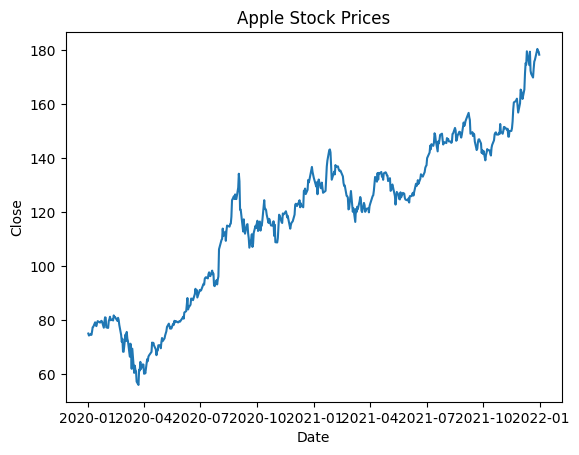

In [391]:
plt.plot(stock_data['date'],stock_data['Close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()

In [392]:
close_data = stock_data.filter(['Close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .8))
print(dataset)
print(training)
type(dataset)

[[ 75.08750153]
 [ 74.35749817]
 [ 74.94999695]
 [ 74.59750366]
 [ 75.79750061]
 [ 77.40750122]
 [ 77.58249664]
 [ 79.23999786]
 [ 78.16999817]
 [ 77.83499908]
 [ 78.80999756]
 [ 79.68250275]
 [ 79.14250183]
 [ 79.42500305]
 [ 79.80750275]
 [ 79.57749939]
 [ 77.23750305]
 [ 79.42250061]
 [ 81.08499908]
 [ 80.96749878]
 [ 77.37750244]
 [ 77.16500092]
 [ 79.71250153]
 [ 80.36250305]
 [ 81.30249786]
 [ 80.00749969]
 [ 80.38749695]
 [ 79.90249634]
 [ 81.80000305]
 [ 81.21749878]
 [ 81.23750305]
 [ 79.75      ]
 [ 80.90499878]
 [ 80.07499695]
 [ 78.26249695]
 [ 74.54499817]
 [ 72.01999664]
 [ 73.16249847]
 [ 68.37999725]
 [ 68.33999634]
 [ 74.70249939]
 [ 72.33000183]
 [ 75.68499756]
 [ 73.23000336]
 [ 72.25749969]
 [ 66.54250336]
 [ 71.33499908]
 [ 68.85749817]
 [ 62.05749893]
 [ 69.49250031]
 [ 60.55250168]
 [ 63.21500015]
 [ 61.66749954]
 [ 61.19499969]
 [ 57.31000137]
 [ 56.09249878]
 [ 61.72000122]
 [ 61.38000107]
 [ 64.61000061]
 [ 61.93500137]
 [ 63.70249939]
 [ 63.57249832]
 [ 60.22

numpy.ndarray

In [393]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(344, 60, 1)

In [394]:
model = keras.models.Sequential()
model.add(keras.layers.LSTM(units=64,
							return_sequences=True,
							input_shape=(x_train.shape[1], 1)))
model.add(keras.layers.LSTM(units=64))
model.add(keras.layers.Dense(32))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))
print(model.summary())


Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_66 (LSTM)              (None, 60, 64)            16896     
                                                                 
 lstm_67 (LSTM)              (None, 64)                33024     
                                                                 
 dense_66 (Dense)            (None, 32)                2080      
                                                                 
 dropout_33 (Dropout)        (None, 32)                0         
                                                                 
 dense_67 (Dense)            (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 (203.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [395]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)


Epoch 1/10
11/11 [==============================] - 2s 22ms/step - loss: 0.0610
Epoch 2/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0203
Epoch 3/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0141
Epoch 4/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0121
Epoch 5/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0115
Epoch 6/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0114
Epoch 7/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0101
Epoch 8/10
11/11 [==============================] - 0s 22ms/step - loss: 0.0090
Epoch 9/10
11/11 [==============================] - 0s 23ms/step - loss: 0.0105
Epoch 10/10
11/11 [==============================] - 0s 25ms/step - loss: 0.0108


In [396]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))




# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))


4/4 [==============================] - 0s 6ms/step
MSE 93.54441303027794
RMSE 9.671836073377067


In [397]:
pred_data = yf.download('AAPL', start='2022-01-01', end='2022-06-01')
pred_data['date'] = pred_data.index
pred_data['date'] = pd.to_datetime(pred_data['date'])
pred_close_data = pred_data.filter(['Close'])
pred_dataset = pred_close_data.values

scaler_pred = MinMaxScaler(feature_range=(0,1))
pred_scaled_data = scaler_pred.fit_transform(pred_dataset)
x_pred = []
for i in range(60, len(pred_scaled_data)):
    x_pred.append(pred_scaled_data[i-60:i, 0])

x_pred = np.array(x_pred)
x_pred = np.reshape(x_pred, (x_pred.shape[0], x_pred.shape[1],1))

pred = model.predict(x_pred)
pred = scaler_pred.inverse_transform(pred)


type(pred)

[*********************100%%**********************]  1 of 1 completed
2/2 [==============================] - 0s 5ms/step


numpy.ndarray

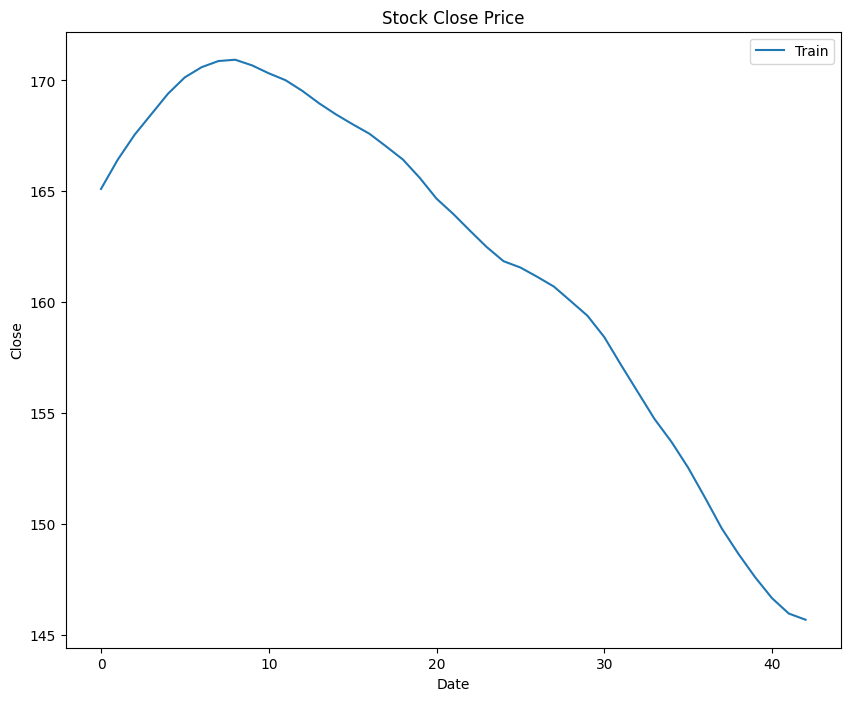

In [398]:
train = stock_data[:training]
test = stock_data[training:]
test['Predictions'] = predictions

plt.figure(figsize=(10, 8))
#plt.plot(train['date'], train['Close'])
#plt.plot(test['date'], test[['Close', 'Predictions']])
plt.plot(range(0,len(pred)), pred)
plt.title('Stock Close Price')
plt.xlabel('Date')
plt.ylabel("Close")
plt.legend(['Train', 'Test', 'Predictions'])
